# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from yellowbrick.cluster import KElbowVisualizer
from scipy import stats

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [3]:
df = pd.read_csv("House_Rent_Dataset.csv")
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [5]:
df.shape

(4746, 12)

In [6]:
df.describe(include="all")

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
count,4746,4746.000000,4.746000e+03,4746.000000,4746,4746,4746,4746,4746,4746,4746.000000,4746
unique,81,NaN,NaN,NaN,480,3,2235,6,3,3,NaN,3
top,2022-07-06,NaN,NaN,NaN,1 out of 2,Super Area,Bandra West,Mumbai,Semi-Furnished,Bachelors/Family,NaN,Contact Owner
freq,311,NaN,NaN,NaN,379,2446,37,972,2251,3444,NaN,3216
mean,NaN,2.083860,3.499345e+04,967.490729,NaN,NaN,NaN,NaN,NaN,NaN,1.965866,NaN
std,NaN,0.832256,7.810641e+04,634.202328,NaN,NaN,NaN,NaN,NaN,NaN,0.884532,NaN
min,NaN,1.000000,1.200000e+03,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
25%,NaN,2.000000,1.000000e+04,550.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
50%,NaN,2.000000,1.600000e+04,850.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN
75%,NaN,3.000000,3.300000e+04,1200.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN


Dapat dilihat bahwa data pada kolom **Rent** memiliki nilai minimum dan maksimum yang ekstrem, yang dapat mempengaruhi proses clustering. Oleh karena itu, saya memilih untuk menghilangkan data ekstrem tersebut dengan memangkas 3% dari nilai terendah dan 3% dari nilai tertinggi.

In [7]:
missing_values = df.isnull().sum()
missing_values

,0
Posted On,0
BHK,0
Rent,0
Size,0
Floor,0
Area Type,0
Area Locality,0
City,0
Furnishing Status,0
Tenant Preferred,0


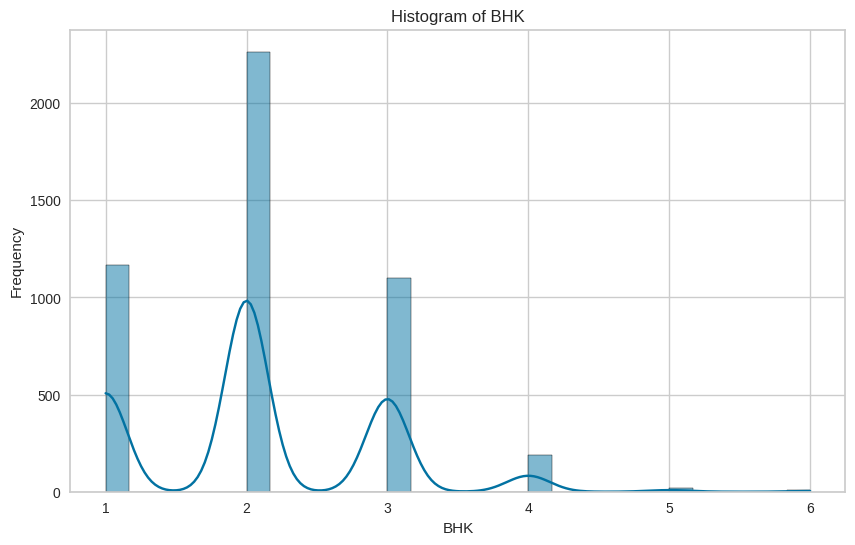

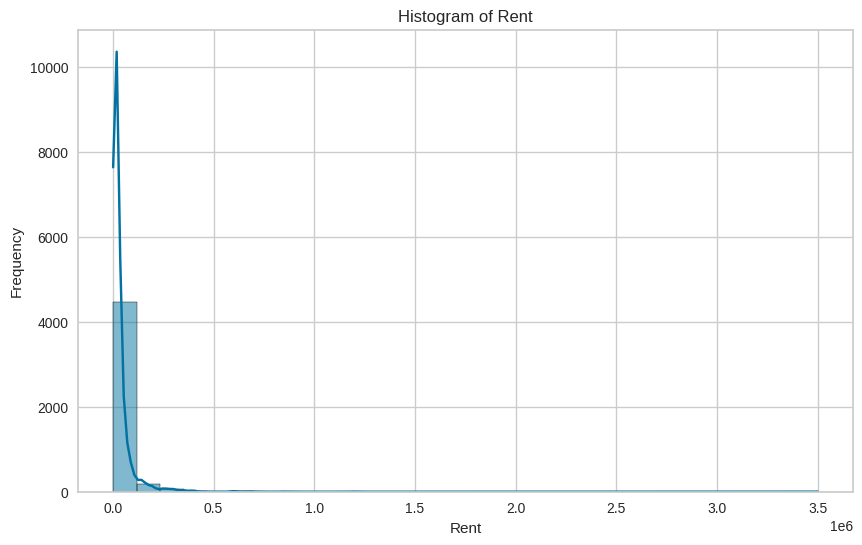

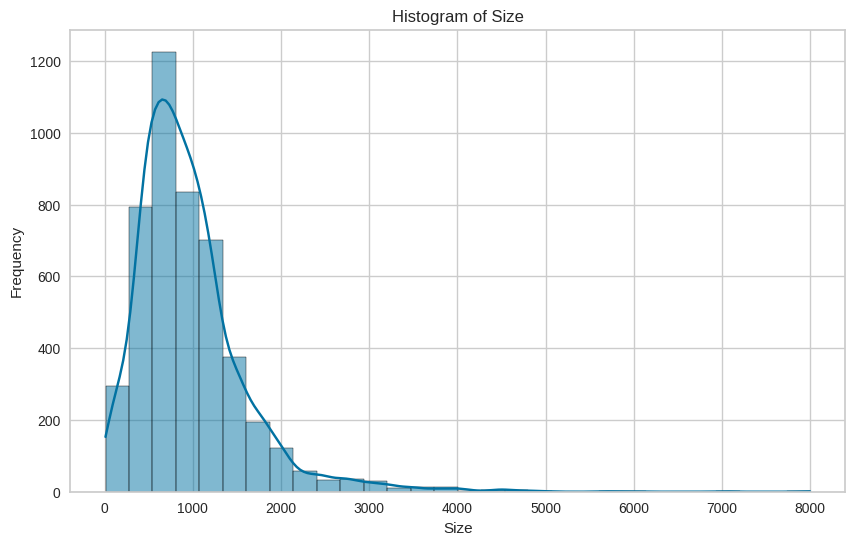

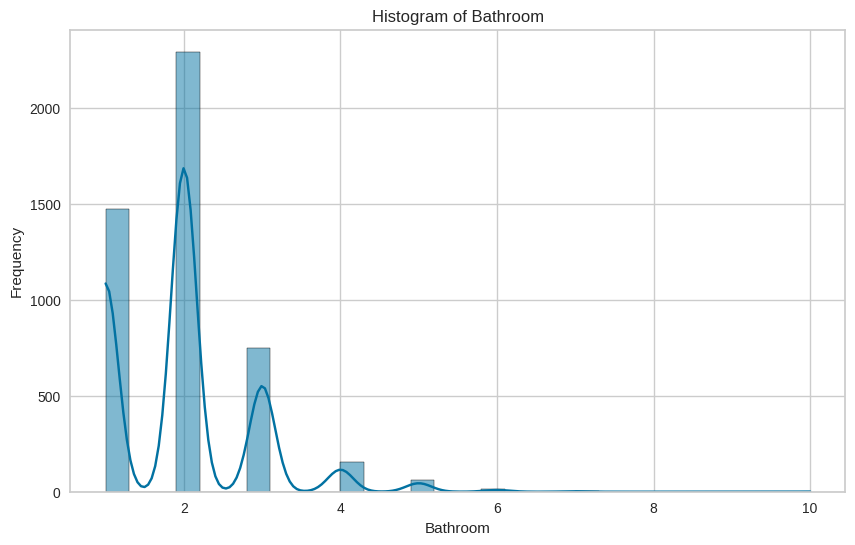

In [8]:
numeric_features = df.select_dtypes(include=np.number).columns.tolist()

for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

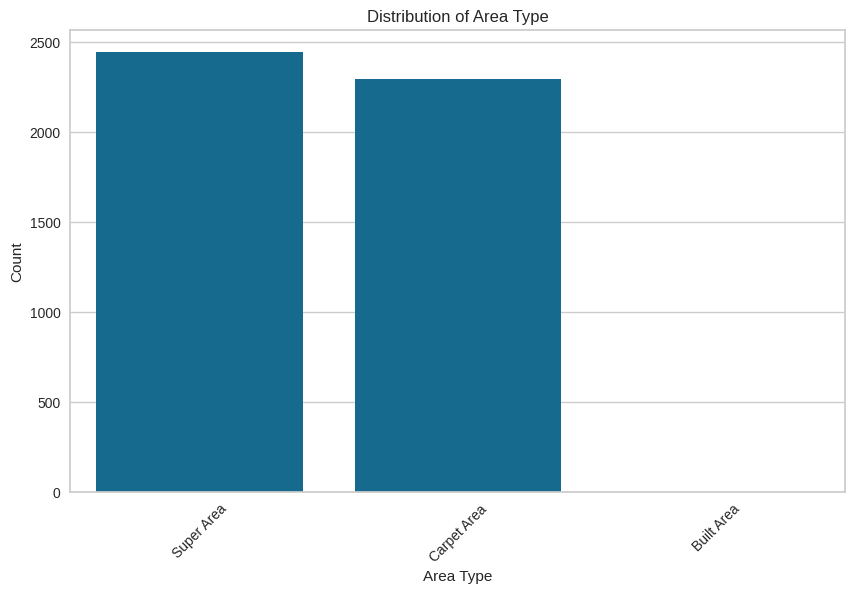

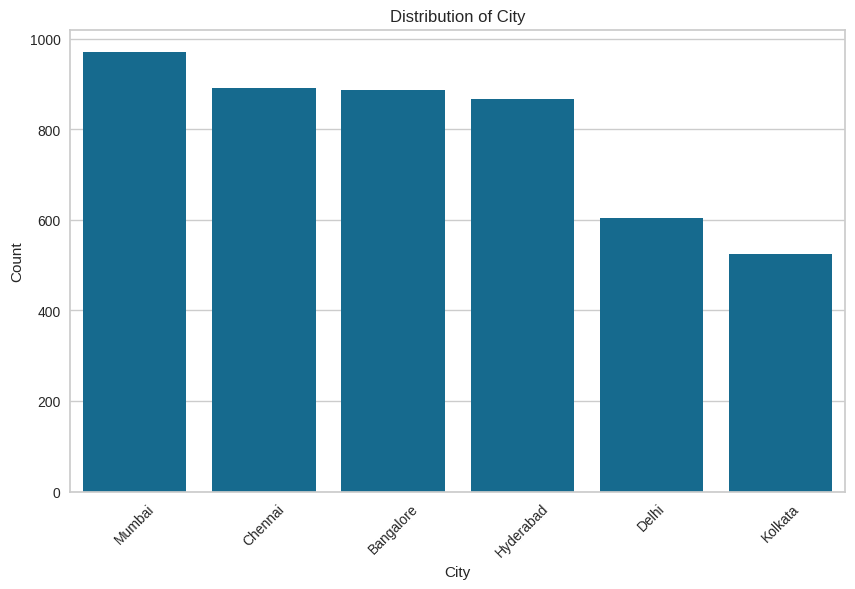

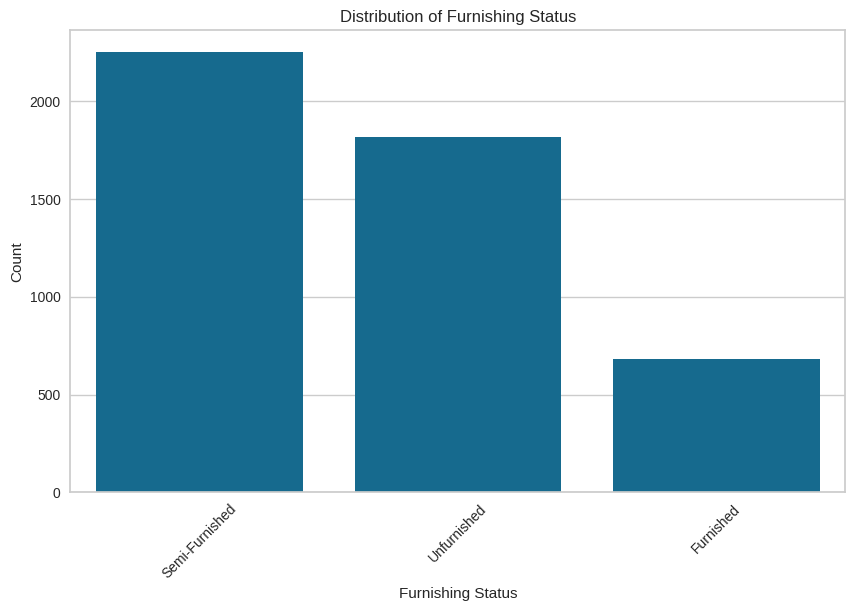

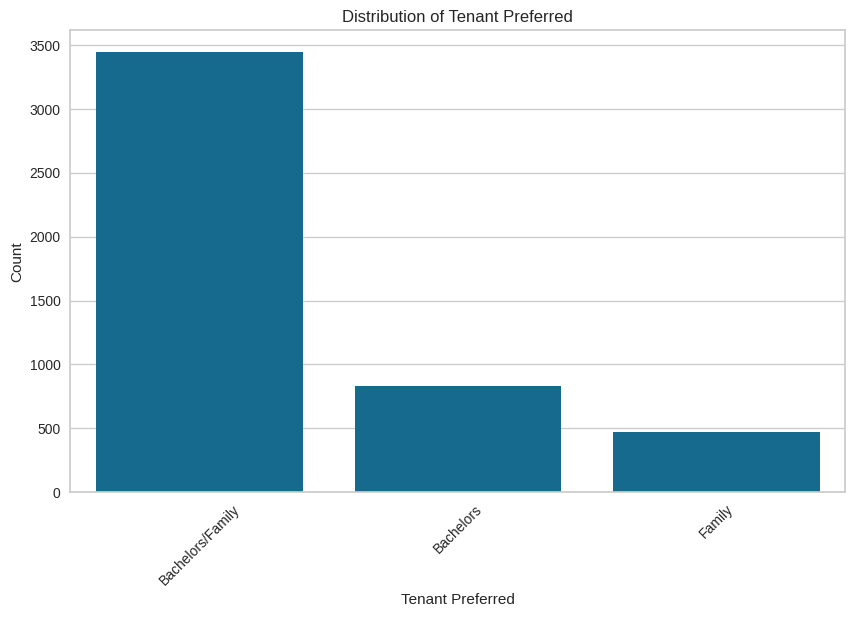

In [9]:
categorical_features = ['Area Type', 'City', 'Furnishing Status', 'Tenant Preferred']

for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=df[feature], data=df, order=df[feature].value_counts().index)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

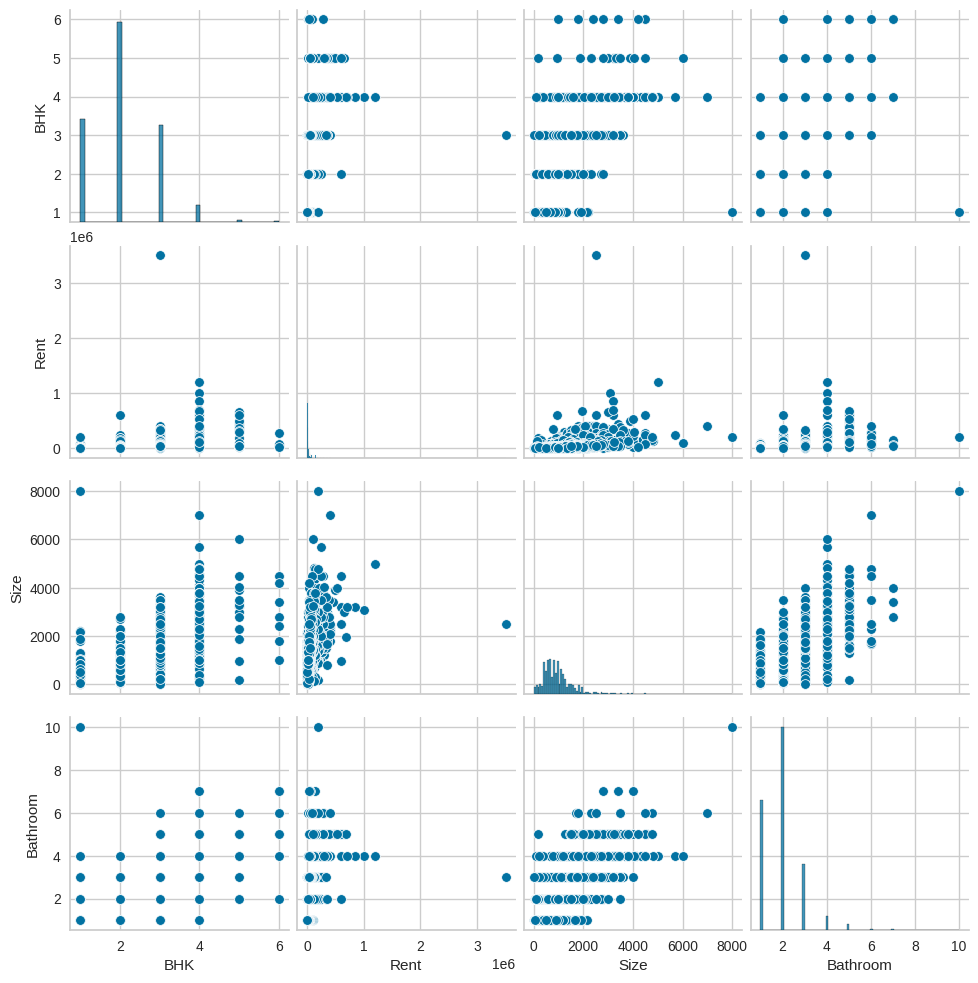

In [10]:
numeric_features = df.select_dtypes(include=['number'])

sns.pairplot(numeric_features)
plt.show()

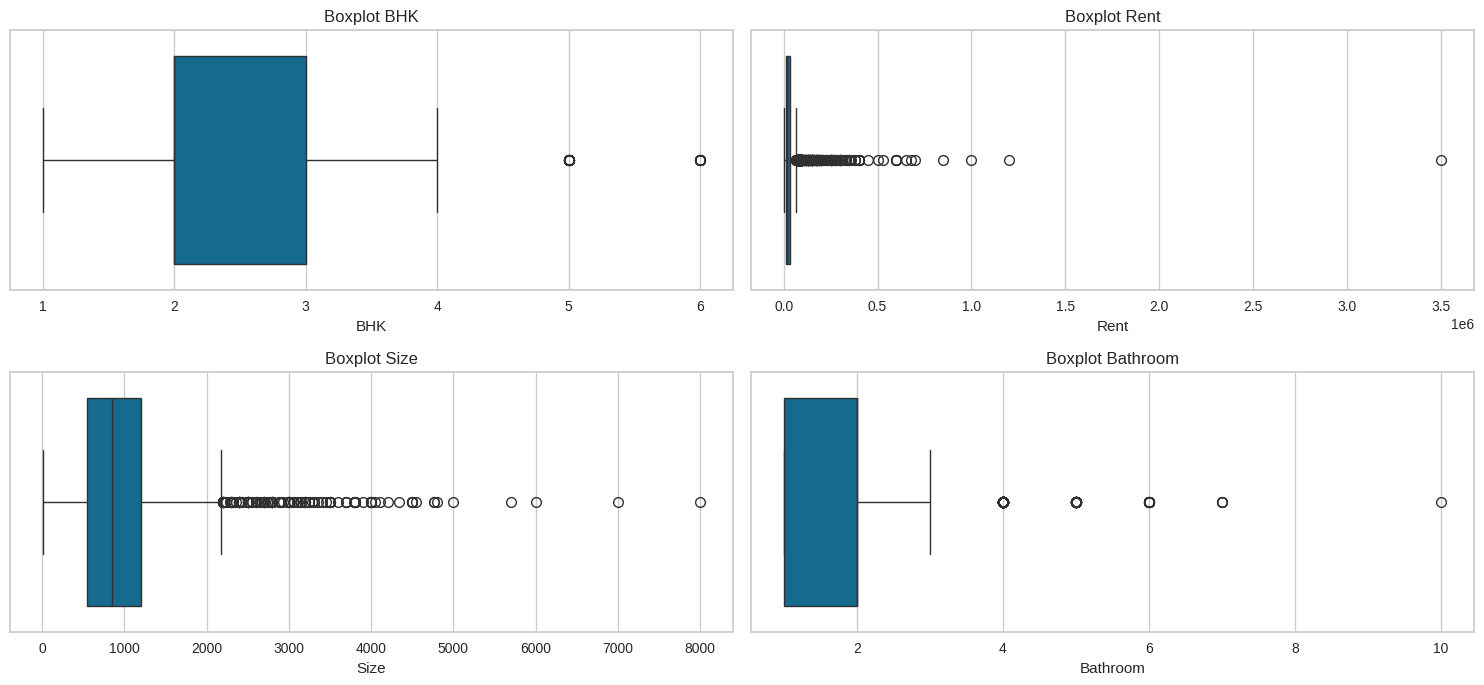

In [11]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_features, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot {col}')
plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

##Penanganan Outlier

In [12]:
numeric_cols = ['BHK','Rent','Size','Bathroom']

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    print(f"Outlier pada {col}: {len(outliers)} data")

    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)


=== Deteksi dan Penanganan Outlier ===
Outlier pada BHK: 27 data
Outlier pada Rent: 520 data
Outlier pada Size: 203 data
Outlier pada Bathroom: 232 data


In [13]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2.0,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2.0,Contact Owner
1,2022-05-13,2.0,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1.0,Contact Owner
2,2022-05-16,2.0,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1.0,Contact Owner
3,2022-07-04,2.0,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1.0,Contact Owner
4,2022-05-09,2.0,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1.0,Contact Owner


In [14]:
df.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4746.000000,4746.000000,4746.000000
mean,2.079330,24568.757480,932.591656,1.920565
std,0.816051,19925.629507,508.369952,0.756434
min,1.000000,1200.000000,10.000000,1.000000
25%,2.000000,10000.000000,550.000000,1.000000
50%,2.000000,16000.000000,850.000000,2.000000
75%,3.000000,33000.000000,1200.000000,2.000000
max,4.500000,67500.000000,2175.000000,3.500000


##Encoding Data Kategorikal

In [15]:
selected_features = ['BHK', 'Rent', 'Size', 'Bathroom', 'City', 'Area Type']
df = df[selected_features]

In [16]:
categorical_cols = ["City", 'Area Type']
numerical_cols = ["BHK", "Rent", "Size", "Bathroom"]


In [17]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
categorical_encoded = encoder.fit_transform(df[categorical_cols])
categorical_df = pd.DataFrame(categorical_encoded, columns=encoder.get_feature_names_out())

##Normalisasi atau Standarisasi Fitur

In [18]:
scaler = MinMaxScaler()
numerical_scaled = scaler.fit_transform(df[numerical_cols])
numerical_df = pd.DataFrame(numerical_scaled, columns=numerical_cols)

df_pre_feature_selection = pd.concat([numerical_df, categorical_df], axis=1)
df_pre_feature_selection.head()


=== Data Setelah Preprocessing (5 Baris Pertama) ===


,BHK,Rent,Size,Bathroom,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Area Type_Built Area,Area Type_Carpet Area,Area Type_Super Area
0,0.285714,0.132730,0.503464,0.4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.285714,0.283560,0.364896,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.285714,0.238311,0.457275,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.285714,0.132730,0.364896,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.285714,0.095023,0.387991,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [19]:
kmeans_before = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters_before = kmeans_before.fit_predict(df_pre_feature_selection)

## **b. Evaluasi Model Clustering**

In [20]:
silhouette_before = silhouette_score(df_pre_feature_selection, clusters_before)
print(f"Silhouette Score: {silhouette_before:.2f}")

Silhouette Score sebelum feature selection: 0.30


Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [21]:
selector = SelectKBest(mutual_info_classif, k=5)
X_selected = selector.fit_transform(df_pre_feature_selection, clusters_before)

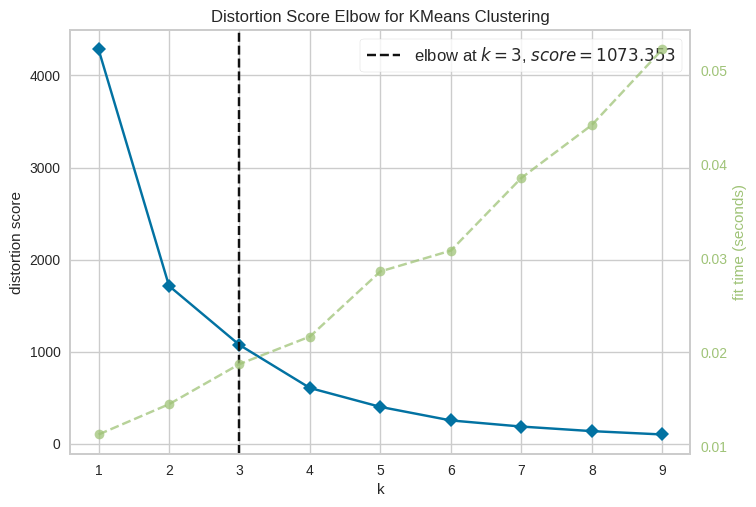

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [22]:
kmeans = KMeans(random_state=42, n_init=10)
visualizer = KElbowVisualizer(kmeans, k=(1, 10))
visualizer.fit(X_selected)
visualizer.show()

In [23]:
print("\n=== Clustering dengan K-Means (Setelah Feature Selection) ===")
kmeans_after = KMeans(n_clusters=5, random_state=42, n_init=10)
clusters_after = kmeans_after.fit_predict(X_selected)

silhouette_after = silhouette_score(X_selected, clusters_after)
print(f"Silhouette Score setelah feature selection: {silhouette_after:.2f}")


selected_feature_indices = selector.get_support(indices=True)
df_selected = df_pre_feature_selection.iloc[:, selected_feature_indices]

df_selected['Cluster'] = clusters_after


=== Clustering dengan K-Means (Setelah Feature Selection) ===
Silhouette Score setelah feature selection: 0.75


<ipython-input-23-06d8a3c32f27>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Cluster'] = clusters_after


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

Jumlah data points: 4746
Jumlah cluster: 5
Explained Variance Ratio: [0.62237647 0.18766282]


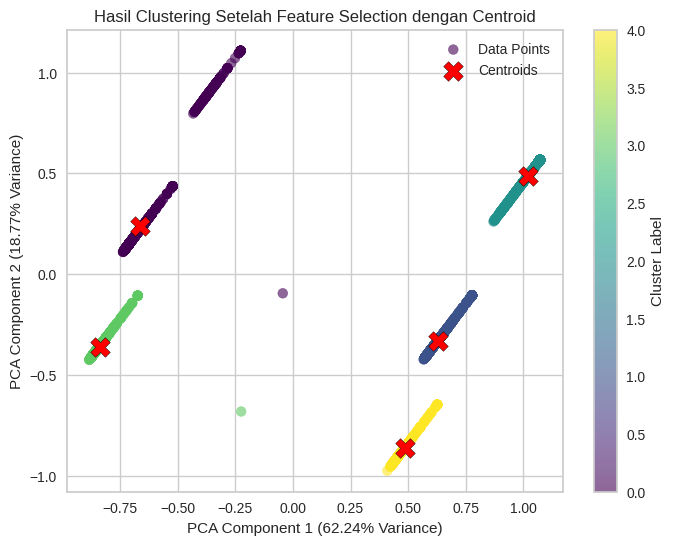

In [24]:

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_selected)
centroids_pca = pca.transform(kmeans_after.cluster_centers_)

explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance Ratio: {explained_variance}")


plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_after, cmap='viridis', alpha=0.6, s=50, label="Data Points")
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='X', s=200, edgecolors='black', label="Centroids")


plt.colorbar(scatter, label="Cluster Label")
plt.xlabel(f'PCA Component 1 ({explained_variance[0]:.2%} Variance)')
plt.ylabel(f'PCA Component 2 ({explained_variance[1]:.2%} Variance)')
plt.title('Hasil Clustering Setelah Feature Selection')
plt.legend()
plt.grid(True)
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [25]:
df_pre_feature_selection['Cluster'] = kmeans_after.labels_

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [26]:
categorical_encoded_cols = encoder.get_feature_names_out()

df_pre_feature_selection[['City', 'Area Type']] = encoder.inverse_transform(
    df_pre_feature_selection[categorical_encoded_cols]
)

In [27]:
df_pre_feature_selection.head()

,BHK,Rent,Size,Bathroom,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Area Type_Built Area,Area Type_Carpet Area,Area Type_Super Area,Cluster,City,Area Type
0,0.285714,0.132730,0.503464,0.4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,Kolkata,Super Area
1,0.285714,0.283560,0.364896,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,Kolkata,Super Area
2,0.285714,0.238311,0.457275,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,Kolkata,Super Area
3,0.285714,0.132730,0.364896,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,Kolkata,Super Area
4,0.285714,0.095023,0.387991,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,Kolkata,Carpet Area


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [28]:
df_pre_feature_selection[numerical_cols] = scaler.inverse_transform(df_pre_feature_selection[numerical_cols])

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [29]:
columns_to_drop = ['City_Bangalore', 'City_Chennai', 'City_Delhi', 'City_Hyderabad', 'City_Kolkata', 'City_Mumbai', 'Area Type_Built Area','Area Type_Carpet Area', 'Area Type_Super Area']

df_normalized = df_pre_feature_selection.drop(columns=columns_to_drop)
df_normalized['Cluster'] = df_normalized['Cluster'] + 1

df_normalized.head()

,BHK,Rent,Size,Bathroom,Cluster,City,Area Type
0,2.0,10000.0,1100.0,2.0,1,Kolkata,Super Area
1,2.0,20000.0,800.0,1.0,1,Kolkata,Super Area
2,2.0,17000.0,1000.0,1.0,1,Kolkata,Super Area
3,2.0,10000.0,800.0,1.0,1,Kolkata,Super Area
4,2.0,7500.0,850.0,1.0,2,Kolkata,Carpet Area


In [30]:
df_normalized.groupby('Cluster').mean(numeric_only=True)

,BHK,Rent,Size,Bathroom
Cluster,,,,
1,1.904984,17021.711939,838.189485,1.706462
2,2.153252,22199.261789,950.456098,1.881707
3,2.232968,51182.850365,913.620438,2.270681
4,2.098071,16369.745981,1064.226688,2.018489
5,2.443089,24236.991870,1274.552846,2.286585


In [31]:
df_normalized.groupby('Cluster').median(numeric_only=True)

,BHK,Rent,Size,Bathroom
Cluster,,,,
1,2.0,13000.0,800.0,2.0
2,2.0,15000.0,850.0,2.0
3,2.0,57000.0,759.0,2.0
4,2.0,13000.0,1100.0,2.0
5,3.0,17000.0,1250.0,2.0


In [32]:
df_normalized.groupby('Cluster').agg(lambda x: x.mode()[0])

,BHK,Rent,Size,Bathroom,City,Area Type
Cluster,,,,,,
1,2.0,15000.0,600.0,2.0,Chennai,Super Area
2,2.0,67500.0,2175.0,2.0,Bangalore,Carpet Area
3,2.0,67500.0,2175.0,2.0,Mumbai,Carpet Area
4,2.0,12000.0,1200.0,2.0,Hyderabad,Super Area
5,3.0,15000.0,2175.0,2.0,Hyderabad,Carpet Area


In [33]:
df_normalized.groupby(['Cluster', 'City'])['City'].count().unstack(fill_value=0)

City,Bangalore,Chennai,Delhi,Hyderabad,Kolkata,Mumbai
Cluster,,,,,,
1,550,576,290,0,260,150
2,336,315,315,0,264,0
3,0,0,0,0,0,822
4,0,0,0,622,0,0
5,0,0,0,246,0,0


In [34]:
df_normalized.groupby(['Cluster', 'Area Type'])['Area Type'].count().unstack(fill_value=0)

Area Type,Built Area,Carpet Area,Super Area
Cluster,,,
1,1,0,1825
2,0,1230,0
3,0,822,0
4,1,0,621
5,0,246,0


# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata BHK:** 1.9  
- **Rata-rata Rent:** 17,021  
- **Rata-rata Size:** 838.19  
- **Rata-rata Bathroom:** 1.7  
- **Dominan di Kota:** Chennai  
- **Area Type Dominan:** Super Area  

**Analisis:**  
Cluster ini memiliki harga sewa yang relatif rendah dengan ukuran rumah yang tidak terlalu besar. Mayoritas properti berada di kota Chennai dan lebih sering berjenis "Super Area". Ini menunjukkan bahwa properti dalam cluster ini mungkin lebih cocok untuk penyewa dengan budget terbatas atau pencari properti ekonomis.

---

## Cluster 2:
- **Rata-rata BHK:** 2.1  
- **Rata-rata Rent:** 22,199  
- **Rata-rata Size:** 950.45  
- **Rata-rata Bathroom:** 1.88  
- **Dominan di Kota:** Bangalore  
- **Area Type Dominan:** Carpet Area  

**Analisis:**  
Cluster ini mencerminkan properti dengan harga sewa yang lebih tinggi dibanding Cluster 1, namun masih dalam kategori menengah. Properti dalam cluster ini banyak ditemukan di Bangalore dengan tipe area "Carpet Area", yang cenderung lebih luas dibanding "Super Area". Cluster ini bisa menarik bagi penyewa yang menginginkan keseimbangan antara harga dan luas rumah.

---

## Cluster 3:
- **Rata-rata BHK:** 2.2  
- **Rata-rata Rent:** 51,182  
- **Rata-rata Size:** 913.62  
- **Rata-rata Bathroom:** 2.27  
- **Dominan di Kota:** Mumbai  
- **Area Type Dominan:** Carpet Area  

**Analisis:**  
Cluster ini memiliki harga sewa yang sangat tinggi, hampir dua kali lipat dibanding cluster sebelumnya. Properti ini banyak terdapat di Mumbai dengan tipe "Carpet Area". Kemungkinan besar cluster ini merupakan properti premium yang disewakan dengan harga tinggi di kota besar.

---

## Cluster 4:
- **Rata-rata BHK:** 2.09  
- **Rata-rata Rent:** 16,369  
- **Rata-rata Size:** 1064.22  
- **Rata-rata Bathroom:** 2.01  
- **Dominan di Kota:** Hyderabad  
- **Area Type Dominan:** Super Area  

**Analisis:**  
Cluster ini memiliki harga sewa yang relatif rendah dibanding cluster lainnya, tetapi ukuran rumahnya lebih besar (1064 sqft). Properti ini banyak ditemukan di Hyderabad dan lebih banyak menggunakan "Super Area". Ini menunjukkan bahwa cluster ini mungkin terdiri dari rumah-rumah luas dengan harga sewa lebih terjangkau.

---

## Cluster 5:
- **Rata-rata BHK:** 2.44  
- **Rata-rata Rent:** 24,236  
- **Rata-rata Size:** 1274.55  
- **Rata-rata Bathroom:** 2.28  
- **Dominan di Kota:** Hyderabad  
- **Area Type Dominan:** Carpet Area  

**Analisis:**  
Cluster ini memiliki ukuran properti terbesar (1274 sqft) dengan harga sewa menengah ke atas. Properti ini banyak ditemukan di Hyderabad dengan tipe "Carpet Area". Kemungkinan besar, cluster ini menarik bagi keluarga yang mencari rumah dengan luas yang lebih besar.


# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260  
- **Rata-rata Spending Score (1-100):** 56.48  
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540  
- **Rata-rata Spending Score (1-100):** 82.13  
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000  
- **Rata-rata Spending Score (1-100):** 18.63  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [35]:
df_normalized.to_csv("Hasil_Cluster.csv", index=False)